In [1]:
import numpy as np
import pandas as pd
from modnet.models import MODNetModel
from modnet.preprocessing import MODData
from modnet.featurizers.presets import CompositionOnlyMatminer2023Featurizer
import matplotlib.pyplot as plt 
from pymatgen.core import Composition

from matminer.utils.warnings import IMPUTE_NAN_WARNING
import warnings
warnings.filterwarnings("ignore", message=f".*{IMPUTE_NAN_WARNING}")
warnings.filterwarnings("ignore", f".*(impute_nan=False).*", category=UserWarning)

featurizer = CompositionOnlyMatminer2023Featurizer()
featurizer.composition_featurizers = [f for f in featurizer.composition_featurizers if f.__class__.__name__ != "IonProperty"]

2025-03-18 15:53:14.043244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-18 15:53:14.120667: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-18 15:53:14.120683: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-03-18 15:53:14.621617: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-

In [2]:
df = pd.read_csv('data/df_grouped_formula_complete_dataset.csv')

df["composition"] = df['formula'].map(Composition)
df.rename(columns={'target':'gap expt'}, inplace=True)
df.drop(columns=['index', 'formula'], inplace=True)
df.dropna(subset=['gap expt'], inplace=True)
df = df[['composition', 'gap expt']]
df.head()

,composition,gap expt
0,"(Ag, In, Zn, S)",2.30
1,"(Ag, Cu, In, Ga, Se)",0.07
2,"(Ag, Eu, Ge, S)",2.14
3,"(Ag, Pb, Ge, S)",1.83
4,"(Ag, Pb, Ge, Se)",1.51


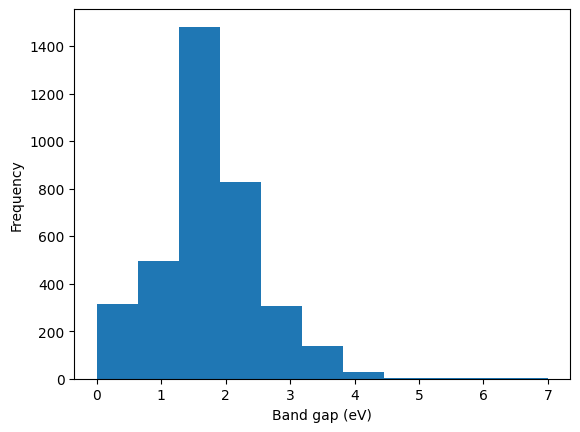

In [3]:
fig, ax = plt.subplots(facecolor="w")
ax.hist(df["gap expt"], bins=11, density=False)
ax.set_ylabel("Frequency")
ax.set_xlabel("Band gap (eV)")
plt.show()

In [4]:
# This instantiates the MODData
data = MODData(
    materials=df["composition"], # you can provide composition objects to MODData
    targets=df["gap expt"], 
    target_names=["gap_expt_eV"],
    featurizer=featurizer
)

2025-03-18 15:53:17,088 - modnet - INFO - Loaded CompositionOnlyMatminer2023Featurizer featurizer.


In [5]:
data.featurize()

2025-03-18 15:53:17,097 - modnet - INFO - Computing features, this can take time...
2025-03-18 15:53:17,099 - modnet - INFO - Applying composition featurizers...
2025-03-18 15:53:17,103 - modnet - INFO - Applying featurizers [AtomicOrbitals(), AtomicPackingEfficiency(), BandCenter(), ElementFraction(), ElementProperty(data_source=<matminer.utils.data.MagpieData object at 0x79e9986e8c70>,
                features=['Number', 'MendeleevNumber', 'AtomicWeight',
                          'MeltingT', 'Column', 'Row', 'CovalentRadius',
                          'Electronegativity', 'NsValence', 'NpValence',
                          'NdValence', 'NfValence', 'NValence', 'NsUnfilled',
                          'NpUnfilled', 'NdUnfilled', 'NfUnfilled', 'NUnfilled',
                          'GSvolume_pa', 'GSbandgap', 'GSmagmom',
                          'SpaceGroupNumber'],
                stats=['minimum', 'maximum', 'range', 'mean', 'avg_dev',
                       'mode']), Miedema(ss_typ

MultipleFeaturizer:  83%|████████▎ | 2980/3605 [19:28<02:28,  4.21it/s]  /home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:216: UserWarning: No data available for atomic_orbitals for Pu
  warnings.warn(f"No data available for {item} for {self.symbol}")
MultipleFeaturizer:  83%|████████▎ | 3010/3605 [19:31<01:31,  6.51it/s]/home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:216: UserWarning: No data available for atomic_orbitals for Pu
  warnings.warn(f"No data available for {item} for {self.symbol}")
MultipleFeaturizer:  86%|████████▌ | 3100/3605 [19:53<01:39,  5.09it/s]/home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:216: UserWarning: No data available for atomic_orbitals for Am
  warnings.warn(f"No data available for {item} for {self.symbol}")
MultipleFeaturizer: 100%|██████████| 3605/3605 [21:46<00:00,  2.76it/s]


2025-03-18 16:15:18,717 - modnet - INFO - Data has successfully been featurized!


In [6]:
from sklearn.model_selection import train_test_split
split = train_test_split(range(100), test_size=0.1, random_state=1234)
train, test = data.split(split)

In [10]:
n_features = 139

train.feature_selection(n=n_features)

2025-03-18 16:16:37,201 - modnet - INFO - Starting target 1/1: gap_expt_eV ...
2025-03-18 16:16:37,202 - modnet - INFO - Computing mutual information between features and target...


/home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/nomad-lanasc/anaconda3/envs/modnet/lib/python3.9/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


2025-03-18 16:16:37,801 - modnet - INFO - Computing optimal features...
2025-03-18 16:16:39,777 - modnet - INFO - Selected 50/139 features...
2025-03-18 16:16:40,983 - modnet - INFO - Selected 100/139 features...
2025-03-18 16:16:41,313 - modnet - INFO - Done with target 1/1: gap_expt_eV.
2025-03-18 16:16:41,314 - modnet - INFO - Merging all features...
2025-03-18 16:16:41,314 - modnet - INFO - Done.


In [11]:
model = MODNetModel([[['gap_expt_eV']]],
                    weights={'gap_expt_eV':1},
                    num_neurons = [[256], [128], [16], [16]],
                    n_feat = n_features,
                    act =  "elu"
                   )

In [18]:
model.fit(train,
          val_fraction = 0.1,
          lr = 0.0002,
          batch_size = 64,
          loss = 'mae',
          epochs = 200,
          verbose = 1,
         )


model.save("models/modnet_gap_expt.tgz")

epoch 0: loss: 0.136, val_loss:0.429 val_mae:0.429
epoch 1: loss: 0.165, val_loss:0.447 val_mae:0.447
epoch 2: loss: 0.132, val_loss:0.440 val_mae:0.440
epoch 3: loss: 0.115, val_loss:0.449 val_mae:0.449
epoch 4: loss: 0.134, val_loss:0.449 val_mae:0.449
epoch 5: loss: 0.118, val_loss:0.430 val_mae:0.430
epoch 6: loss: 0.114, val_loss:0.427 val_mae:0.427
epoch 7: loss: 0.114, val_loss:0.443 val_mae:0.443
epoch 8: loss: 0.119, val_loss:0.437 val_mae:0.437
epoch 9: loss: 0.120, val_loss:0.419 val_mae:0.419
epoch 10: loss: 0.114, val_loss:0.405 val_mae:0.405
epoch 11: loss: 0.121, val_loss:0.400 val_mae:0.400
epoch 12: loss: 0.115, val_loss:0.421 val_mae:0.421
epoch 13: loss: 0.120, val_loss:0.447 val_mae:0.447
epoch 14: loss: 0.131, val_loss:0.443 val_mae:0.443
epoch 15: loss: 0.116, val_loss:0.419 val_mae:0.419
epoch 16: loss: 0.119, val_loss:0.412 val_mae:0.412
epoch 17: loss: 0.123, val_loss:0.413 val_mae:0.413
epoch 18: loss: 0.110, val_loss:0.436 val_mae:0.436
epoch 19: loss: 0.116,

In [19]:
pred = model.predict(test)
index = pred.index.str.replace('id', '').astype(int)
pred['material'] = [df.loc[x, 'composition'] for x in index] 
pred.head()

1/1 [==============================] - 0s 36ms/step


,gap_expt_eV,material
id40,1.799299,"(Ag, In, Al, S)"
id35,2.660298,"(Ag, Ga, Si, Se)"
id81,0.622000,"(Ag, Ge, Se)"
id61,1.798734,"(Ag, Sb, S)"
id98,2.048262,"(Ag, As, S)"


In [20]:
mae_test = np.absolute(pred['gap_expt_eV'].values-test.df_targets.values).mean()
print(f'mae: {mae_test}')

mae: 0.9550843278461031


Predict new structures

In [21]:
new_df = pd.read_csv('data/stable_compositions.csv')

new_df.rename(columns={'Unnamed: 0':'formula'}, inplace=True)

new_df["composition"] = new_df['formula'].map(Composition)

new_structures = MODData(materials=new_df['composition'])
new_structures.featurize()

model = MODNetModel.load("models/modnet_gap_expt.tgz")

new_pred = model.predict(new_structures)

2025-03-18 16:17:22,827 - modnet - INFO - Loaded CompositionOnlyMatminer2023Featurizer featurizer.
2025-03-18 16:17:22,829 - modnet - INFO - Computing features, this can take time...
2025-03-18 16:17:22,829 - modnet - INFO - Applying composition featurizers...
2025-03-18 16:17:22,831 - modnet - INFO - Applying featurizers (AtomicOrbitals(), AtomicPackingEfficiency(), BandCenter(), ElementFraction(), ElementProperty(data_source=<matminer.utils.data.MagpieData object at 0x79ea1c6c6760>,
                features=['Number', 'MendeleevNumber', 'AtomicWeight',
                          'MeltingT', 'Column', 'Row', 'CovalentRadius',
                          'Electronegativity', 'NsValence', 'NpValence',
                          'NdValence', 'NfValence', 'NValence', 'NsUnfilled',
                          'NpUnfilled', 'NdUnfilled', 'NfUnfilled', 'NUnfilled',
                          'GSvolume_pa', 'GSbandgap', 'GSmagmom',
                          'SpaceGroupNumber'],
                stats

MultipleFeaturizer: 100%|██████████| 385/385 [00:59<00:00,  6.48it/s]


2025-03-18 16:18:33,744 - modnet - INFO - Data has successfully been featurized!
2025-03-18 16:18:33,772 - modnet - INFO - Loaded <modnet.models.vanilla.MODNetModel object at 0x79ea1cf044f0> object, created with modnet version 0.4.4
13/13 [==============================] - 0s 796us/step


In [22]:
index = new_pred.index.str.replace('id', '').astype(int)
new_pred['material'] = [new_df.loc[x, 'formula'] for x in index]
new_pred.head()

,gap_expt_eV,material
id0,1.092098,BaPbS3
id1,2.144469,BaPrS3
id2,2.675981,BaCeS3
id3,0.784368,BaHfS3
id4,1.718189,BaZrS3


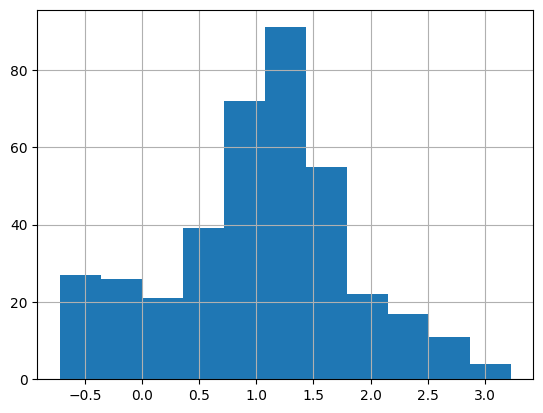

In [23]:
new_pred.gap_expt_eV.hist(bins=11, density=False)
ax.set_ylabel("Frequency")
ax.set_xlabel("Band gap (eV)")
plt.show()

In [24]:
new_pred.head(20)

,gap_expt_eV,material
id0,1.092098,BaPbS3
id1,2.144469,BaPrS3
id2,2.675981,BaCeS3
id3,0.784368,BaHfS3
id4,1.718189,BaZrS3
id5,1.520072,BaTbS3
id6,1.763275,BaUS3
id7,1.598196,EuCuS3
id8,0.857723,EuCuSe3
id9,1.805027,EuScS3
